In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import chi2
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr, kendalltau, spearmanr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [62]:

df = pd.read_excel('C:/Users/ASUS/Documents/Exam_1_Cuantitativo/datos.xls', sheet_name='Wine Quality',
                  header=1, skiprows=[0])
df.head(5)

,Calidad del Vino,Acidez Fija,Acidez Volátil,Ácido Cítrico,Azúcar Residual,Cloruros,Dióxido de Azúfre Libre,Dióxido de Azúfre Total,Densidad,pH,Sulfatos,Alcohol
0,6,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,6,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,6,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,6,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [68]:
# Seleccionar variables y definir Y como la columna 'Densidad'
X = df.drop(columns=['pH', 'Sulfatos', 'Cloruros', 'Acidez Volátil', 'Acidez Fija', 'Calidad del Vino'])
Y = df['Densidad']

# Estandarizar variables
scaler = StandardScaler()   #### redefenir la funcion 
X_std = scaler.fit_transform(X)

In [69]:
# Pearson
corr_pearson = X.corr(method='pearson')['Densidad']

# Kendall
corr_kendall = X.corr(method='kendall')['Densidad']

# Spearman
corr_spearman = X.corr(method='spearman')['Densidad']

In [16]:
print('Matriz de correlación de Pearson:')
print(corr_pearson)


Matriz de correlación de Pearson:
Ácido Cítrico              0.149503
Azúcar Residual            0.838966
Dióxido de Azúfre Libre    0.294210
Dióxido de Azúfre Total    0.529881
Densidad                   1.000000
Alcohol                   -0.780138
Name: Densidad, dtype: float64


In [18]:
print('Matriz de correlación de Kendall:')
print(corr_kendall)


Matriz de correlación de Kendall:
Ácido Cítrico              0.061542
Azúcar Residual            0.588989
Dióxido de Azúfre Libre    0.217295
Dióxido de Azúfre Total    0.388378
Densidad                   1.000000
Alcohol                   -0.635104
Name: Densidad, dtype: float64


In [19]:
print('Matriz de correlación de Spearman:')
print(corr_spearman)

Matriz de correlación de Spearman:
Ácido Cítrico              0.091425
Azúcar Residual            0.780365
Dióxido de Azúfre Libre    0.327822
Dióxido de Azúfre Total    0.563824
Densidad                   1.000000
Alcohol                   -0.821855
Name: Densidad, dtype: float64


<AxesSubplot:>

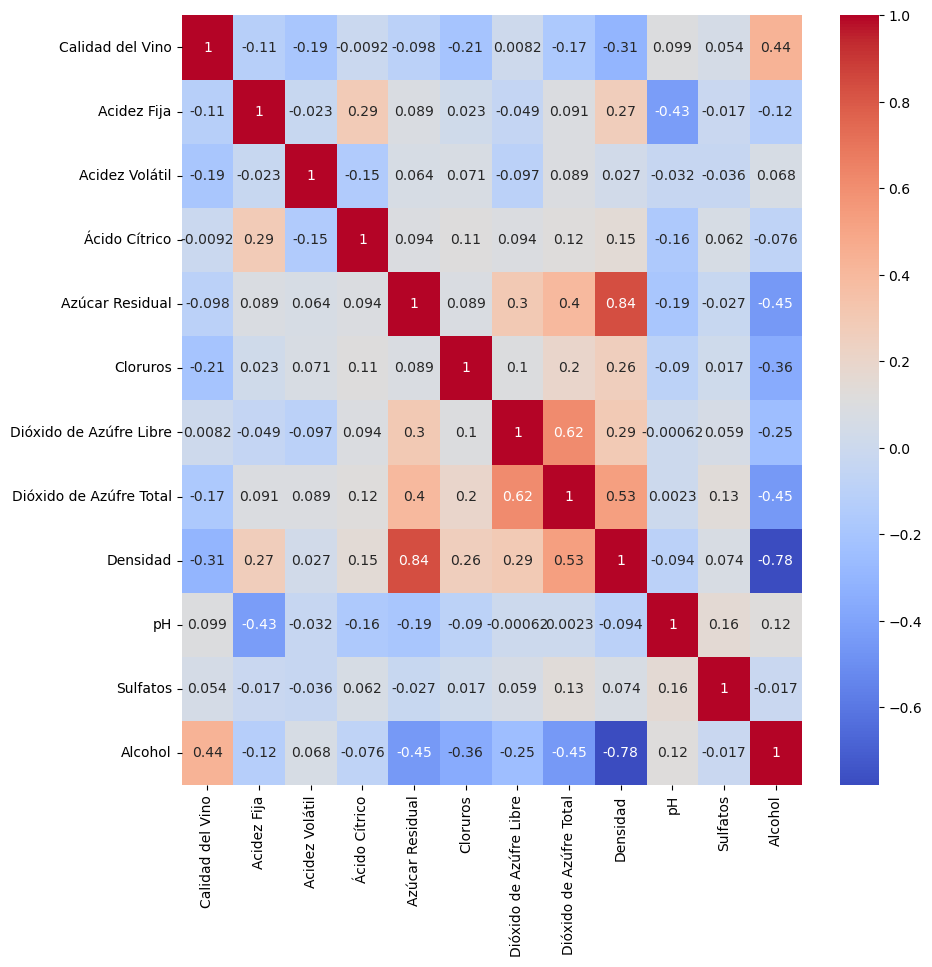

In [24]:
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(method='pearson'), annot=True, cmap='coolwarm')


<AxesSubplot:>

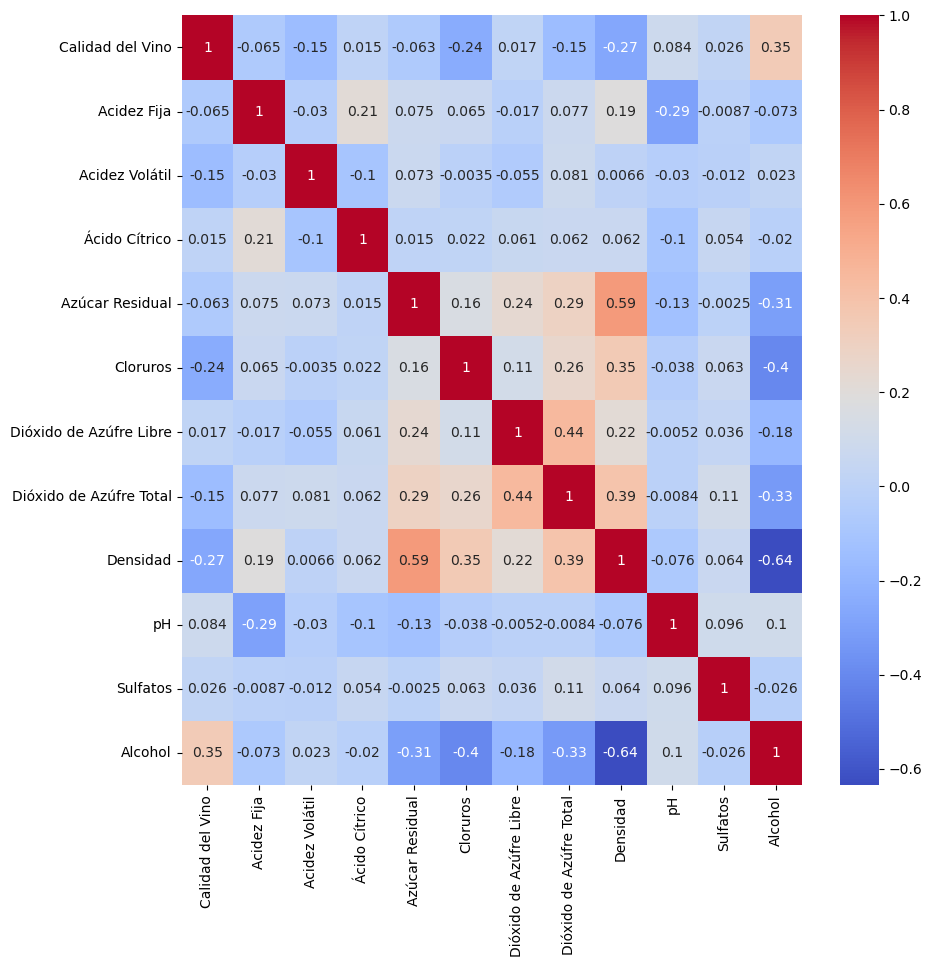

In [25]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(method='kendall'), annot=True, cmap='coolwarm')


<AxesSubplot:>

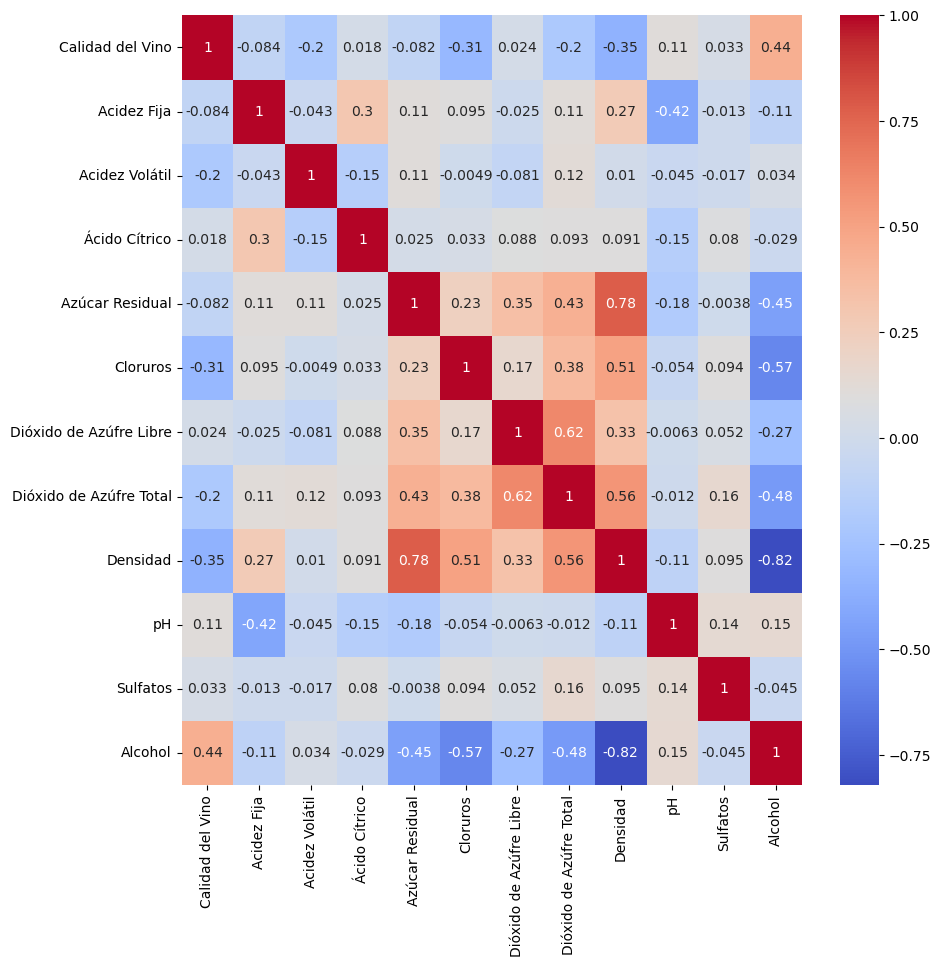

In [26]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(method='spearman'), annot=True, cmap='coolwarm')

In [70]:
# Seleccionar variables y definir Y como la columna 'Densidad'
X = df.drop(columns=['Densidad','pH', 'Sulfatos', 'Cloruros', 'Acidez Volátil', 'Acidez Fija', 'Calidad del Vino'])
Y = df['Densidad']

# Estandarizar variables
scaler = StandardScaler()   #### redefenir la funcion 
X_std = scaler.fit_transform(X)


# Dividir datos en muestra de entrenamiento y muestra de prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [71]:
# Construir modelo RLM utilizando matriz de correlación de Pearson
model_pearson = sm.OLS(y_train, X_train).fit()
print("Modelo RLM utilizando matriz de correlación de Pearson:\n", model_pearson.params)

# Construir modelo RLM utilizando matriz de correlación de Kendall
model_kendall = sm.OLS(y_train, X_train, missing='drop').fit()
print("Modelo RLM utilizando matriz de correlación de Kendall:\n", model_kendall.params)

# Construir modelo RLM utilizando matriz de correlación de Spearman
model_spearman = sm.OLS(y_train, X_train, missing='drop').fit()
print("Modelo RLM utilizando matriz de correlación de Spearman:\n", model_spearman.params)

Modelo RLM utilizando matriz de correlación de Pearson:
 Ácido Cítrico              0.124326
Azúcar Residual            0.005757
Dióxido de Azúfre Libre   -0.000333
Dióxido de Azúfre Total    0.001228
Alcohol                    0.071506
dtype: float64
Modelo RLM utilizando matriz de correlación de Kendall:
 Ácido Cítrico              0.124326
Azúcar Residual            0.005757
Dióxido de Azúfre Libre   -0.000333
Dióxido de Azúfre Total    0.001228
Alcohol                    0.071506
dtype: float64
Modelo RLM utilizando matriz de correlación de Spearman:
 Ácido Cítrico              0.124326
Azúcar Residual            0.005757
Dióxido de Azúfre Libre   -0.000333
Dióxido de Azúfre Total    0.001228
Alcohol                    0.071506
dtype: float64


In [72]:
# Predecir valores de la muestra de prueba utilizando cada modelo
y_pred_pearson = model_pearson.predict(X_test)
y_pred_kendall = model_kendall.predict(X_test)
y_pred_spearman = model_spearman.predict(X_test)

# Calcular el RMSE de la predicción para cada modelo
rmse_pearson = np.sqrt(mean_squared_error(y_test, y_pred_pearson))
rmse_kendall = np.sqrt(mean_squared_error(y_test, y_pred_kendall))
rmse_spearman = np.sqrt(mean_squared_error(y_test, y_pred_spearman))

print("RMSE del modelo RLM utilizando matriz de correlación de Pearson:", rmse_pearson)
print("RMSE del modelo RLM utilizando matriz de correlación de Kendall:", rmse_kendall)
print("RMSE del modelo RLM utilizando matriz de correlación de Spearman:", rmse_spearman)

RMSE del modelo RLM utilizando matriz de correlación de Pearson: 0.08080880295333835
RMSE del modelo RLM utilizando matriz de correlación de Kendall: 0.08080880295333835
RMSE del modelo RLM utilizando matriz de correlación de Spearman: 0.08080880295333835


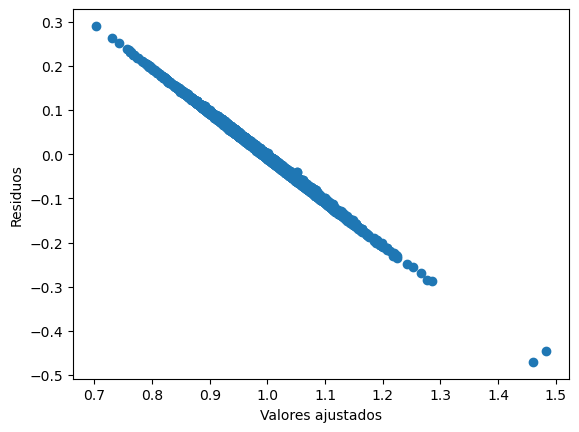

ShapiroResult(statistic=0.9949695467948914, pvalue=2.2786719733325356e-10)


In [73]:
plt.scatter(model_pearson.fittedvalues, model_pearson.resid)
plt.xlabel('Valores ajustados')
plt.ylabel('Residuos')
plt.show()

# Prueba de normalidad de los residuos
from scipy.stats import shapiro
print(shapiro(model_pearson.resid))

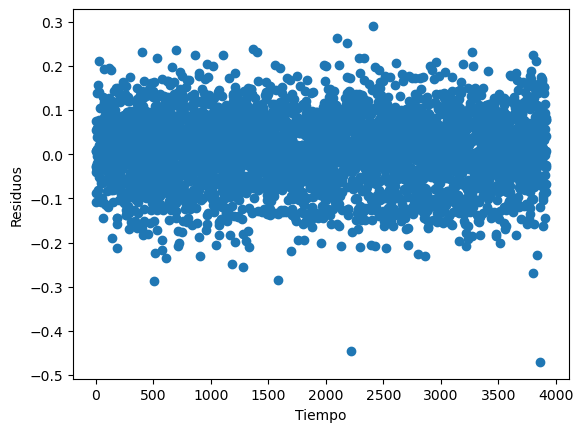

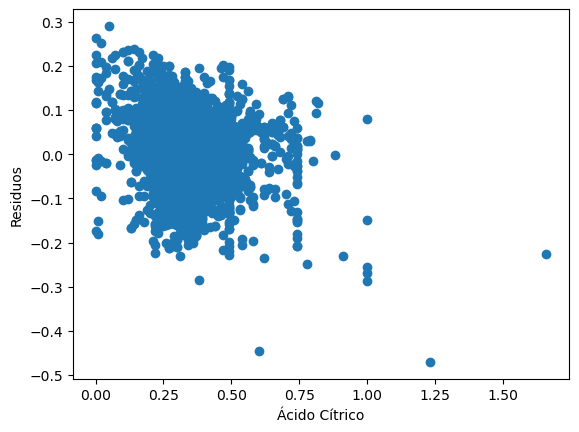

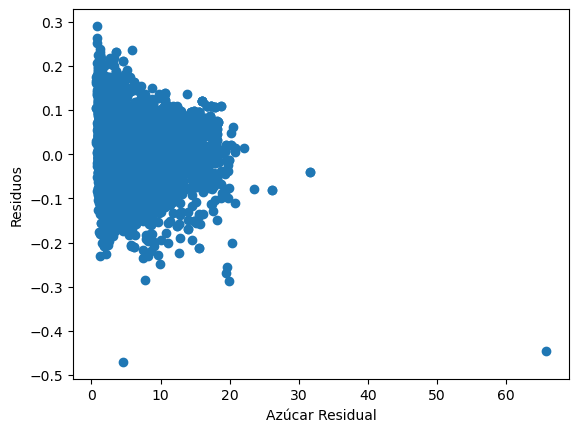

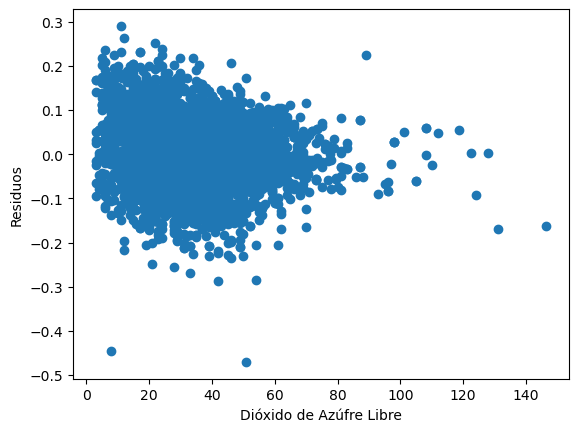

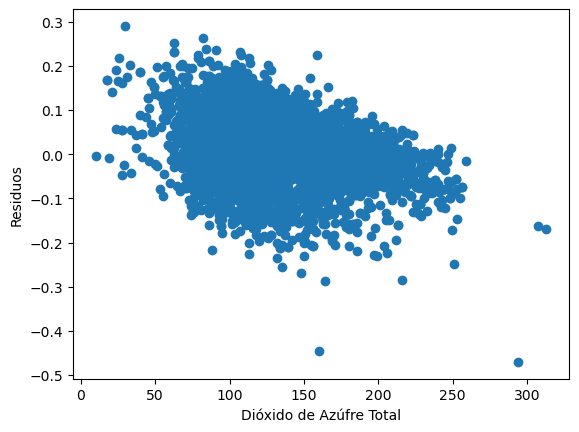

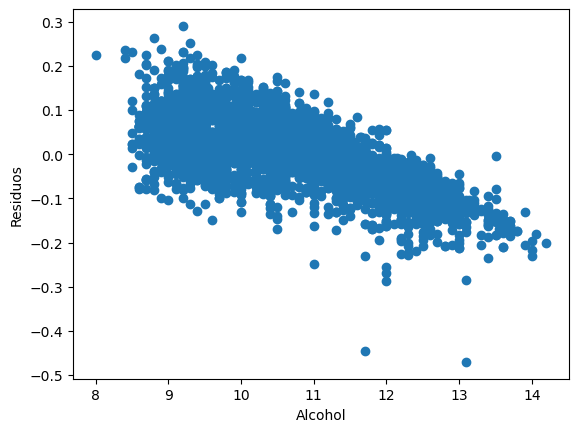

In [74]:
# Graficar residuos vs. el tiempo
plt.scatter(range(len(model_pearson.resid)), model_pearson.resid)
plt.xlabel('Tiempo')
plt.ylabel('Residuos')
plt.show()

# Graficar residuos vs. valores de las variables predictoras
for column in X_train.columns:
    plt.scatter(X_train[column], model_pearson.resid)
    plt.xlabel(column)
    plt.ylabel('Residuos')
    plt.show()

In [79]:
X = sm.add_constant(X)
rlm_model = sm.RLM(Y, X)
results = rlm_model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               Densidad   No. Observations:                 4898
Model:                            RLM   Df Residuals:                     4892
Method:                          IRLS   Df Model:                            5
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 13 May 2023                                         
Time:                        00:16:18                                         
No. Iterations:                    50                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       1.0030      0.000   7561.700      0.000       1.003       1.003
Ácido Cítrico               0.0011   8.78e-05     12.379      0.000       0.001       0.001
Azúcar Residual             0.0003   2.41e-06    139.029      0.000       0.000       0.000
Dióxido de Azúfre Libre -1.271e-05    7.9e-07    -16.093      0.000   -1.43e-05   -1.12e-05
Dióxido de Azúfre Total  8.664e-06   3.46e-07     25.060      0.000    7.99e-06    9.34e-06
Alcohol                    -0.0012   1.02e-05   -114.754      0.000      -0.001      -0.001
===========================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

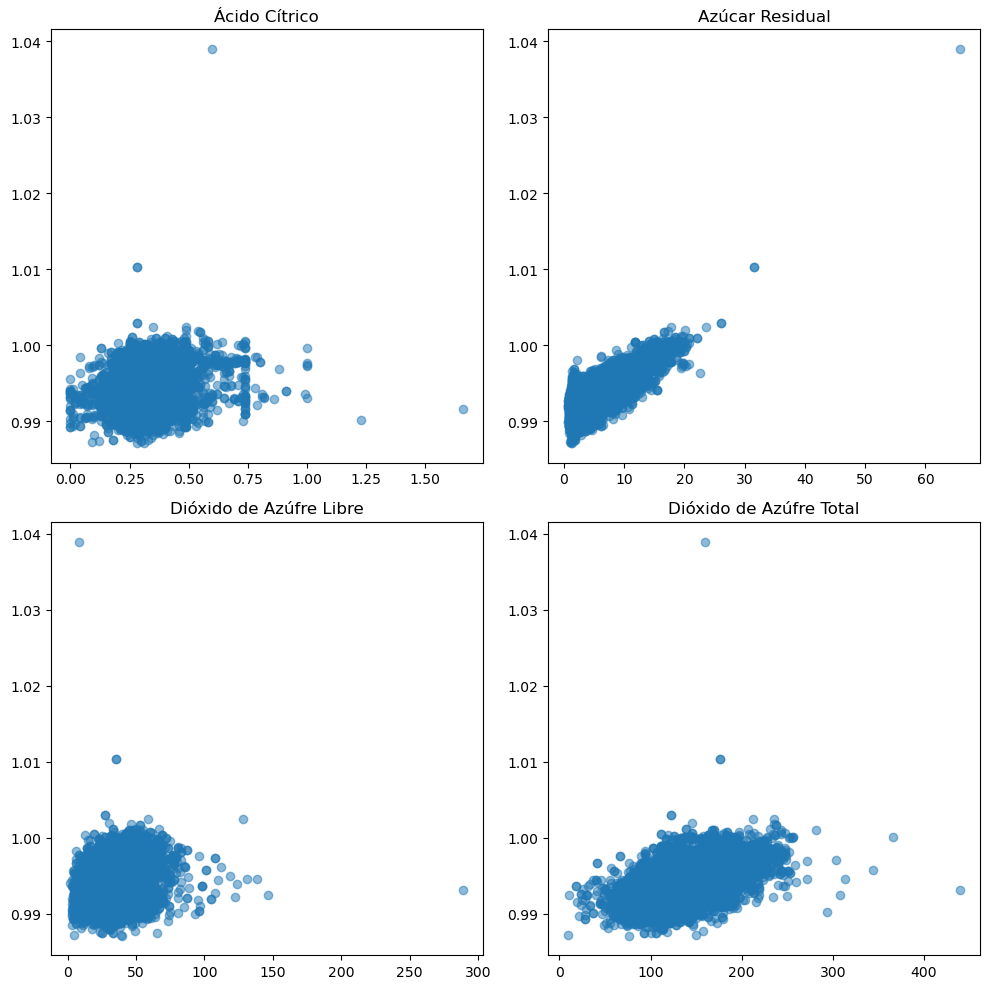

In [105]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].scatter(X['Ácido Cítrico'], Y, alpha=0.5)
axs[0, 0].set_title('Ácido Cítrico')

axs[0, 1].scatter(X['Azúcar Residual'], Y, alpha=0.5)
axs[0, 1].set_title('Azúcar Residual')

axs[1, 0].scatter(X['Dióxido de Azúfre Libre'], Y, alpha=0.5)
axs[1, 0].set_title('Dióxido de Azúfre Libre')

axs[1, 1].scatter(X['Dióxido de Azúfre Total'], Y, alpha=0.5)
axs[1, 1].set_title('Dióxido de Azúfre Total')

plt.tight_layout()
plt.savefig('table_3.png', dpi=300)
plt.show()

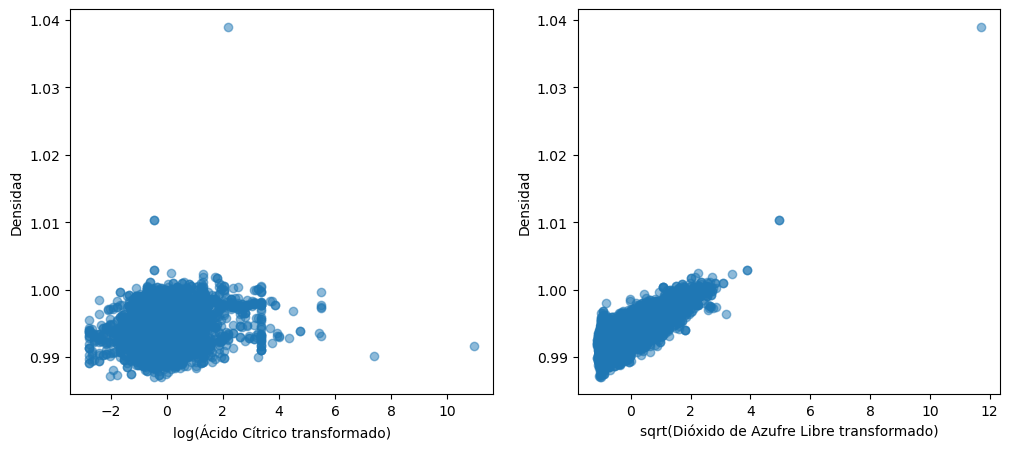

In [91]:
fig, axs = plt.subplots(1, 2, figsize=(12,5))

# Gráfico 1 - Ácido Cítrico transformado
axs[0].scatter(X_std[:, 0], Y, alpha=0.5)
axs[0].set_xlabel('log(Ácido Cítrico transformado)')
axs[0].set_ylabel('Densidad')

# Gráfico 2 - Dióxido de Azufre Libre transformado
axs[1].scatter(X_std[:, 1], Y, alpha=0.5)
axs[1].set_xlabel('sqrt(Dióxido de Azufre Libre transformado)')
axs[1].set_ylabel('Densidad')

plt.show()

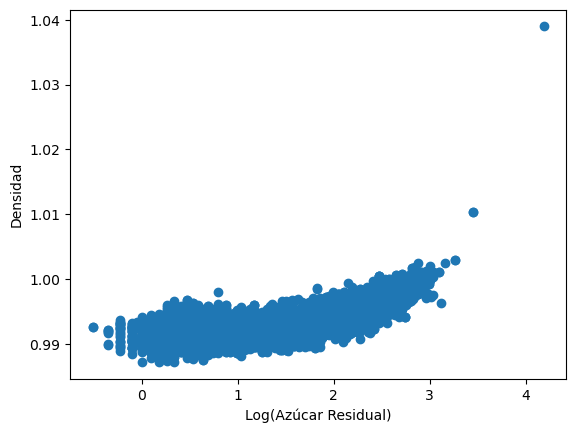

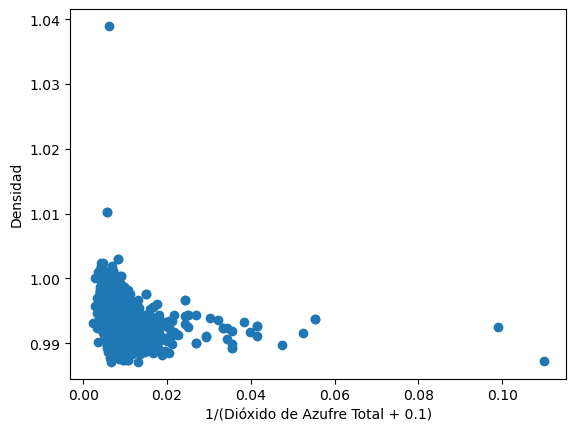

In [99]:
# Transformación de Azúcar Residual
X_sugar = np.log(X['Azúcar Residual'])
plt.scatter(X_sugar, Y)
plt.xlabel('Log(Azúcar Residual)')
plt.ylabel('Densidad')
plt.show()

# Transformación de Dióxido de Azúfre Total
X_sulfur = 1 / (X['Dióxido de Azúfre Total'] + 0.1)
plt.scatter(X_sulfur, Y)
plt.xlabel('1/(Dióxido de Azufre Total + 0.1)')
plt.ylabel('Densidad')
plt.show()

In [100]:
X_log = X.copy()
X_log['Ácido Cítrico'] = np.log(X['Ácido Cítrico'])
X_log['Azúcar Residual'] = np.log(X['Azúcar Residual'])
X_log['Dióxido de Azúfre Libre'] = np.log(X['Dióxido de Azúfre Libre'])
X_log['Dióxido de Azúfre Total'] = np.log(X['Dióxido de Azúfre Total'])

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


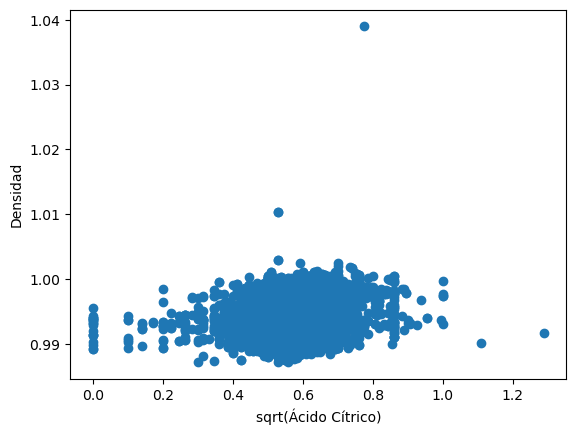

In [101]:
plt.scatter(np.sqrt(df['Ácido Cítrico']), df['Densidad'])
plt.xlabel('sqrt(Ácido Cítrico)')
plt.ylabel('Densidad')
plt.show()

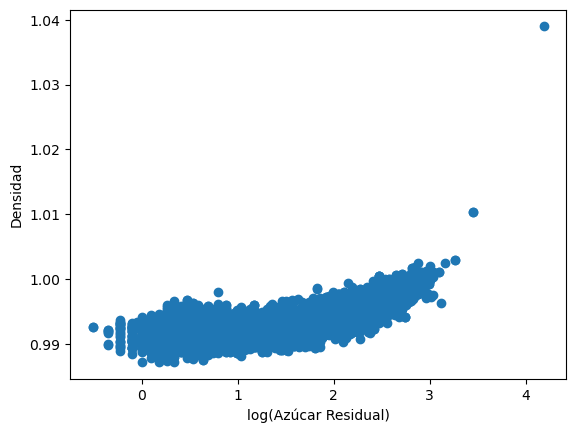

In [102]:
plt.scatter(np.log(df['Azúcar Residual']), df['Densidad'])
plt.xlabel('log(Azúcar Residual)')
plt.ylabel('Densidad')
plt.show()

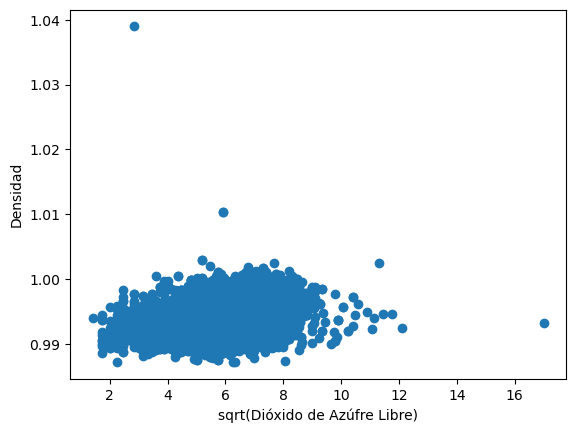

In [103]:
plt.scatter(np.sqrt(df['Dióxido de Azúfre Libre']), df['Densidad'])
plt.xlabel('sqrt(Dióxido de Azúfre Libre)')
plt.ylabel('Densidad')
plt.show()

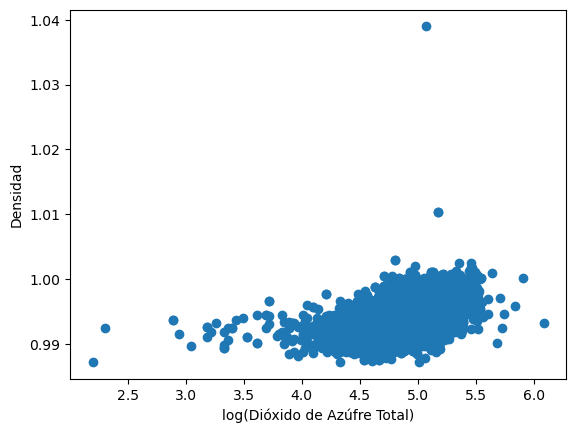

In [104]:
plt.scatter(np.log(df['Dióxido de Azúfre Total']), df['Densidad'])
plt.xlabel('log(Dióxido de Azúfre Total)')
plt.ylabel('Densidad')
plt.show()